# Intro to Pandas
Duncan Callaway

My objective in this notebook is to review enough of the basics to give people a clear sense of what a pandas **data frame** is and what it can contain.  

## Pandas references

(taken from DS100) 

Introductory:

* [Getting started with Python for research](https://github.com/TiesdeKok/LearnPythonforResearch), a gentle introduction to Python in data-intensive research.

* [A Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/index.html), by Jake VanderPlas, another quick Python intro (with notebooks).

Core Pandas/Data Science books:

* [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), by Jake VanderPlas.

* [Python for Data Analysis, 2nd Edition](http://proquest.safaribooksonline.com/book/programming/python/9781491957653), by  Wes McKinney, creator of Pandas. [Companion Notebooks](https://github.com/wesm/pydata-book)

* [Effective Pandas](https://github.com/TomAugspurger/effective-pandas), a book by Tom Augspurger, core Pandas developer.


Complementary resources:

* [An introduction to "Data Science"](https://github.com/stefanv/ds_intro), a collection of Notebooks by BIDS' [Stéfan Van der Walt](https://bids.berkeley.edu/people/st%C3%A9fan-van-der-walt).

* [Effective Computation in Physics](http://proquest.safaribooksonline.com/book/physics/9781491901564), by Kathryn D. Huff; Anthony Scopatz. [Notebooks to accompany the book](https://github.com/physics-codes/seminar). Don't be fooled by the title, it's a great book on modern computational practices with very little that's physics-specific.

## Introduction 
In Data8 you used the `tables` library to organize and manipulate data.  I've not used tables but it has been described to me as a 'light' version of pandas.  So this will be somewhat familiar to you.

Pandas has several features that make it immediately better than numpy for organizing data.
1. You can have different data types (string, int, float) in each column
2. You can label columns (headers)
3. You can label rows (index)

We call the data structure that holds all these things together a **data frame**

**Ambiguity alert**: up to now we've talked about indexing to access individual elements of a data structure.  The index in pandas has a slightly more specific meaning, in that it references the rows of the data frame.  Pandas documentation talks about "location" or "position" in place using "index" as we did with the other data structures.  I'll try my best to disambiguate, but also rely on context to clarify the meaning of the terms.

At its core, the data frame structure is what draws us to use pandas.  But it also has a bunch of great built-in functions you can use to manipulate data once it is loaded in.

In [1]:
import pandas as pd

I'm going to define a simple data frame in a way that you can see the connections to existing Python data types and structures.  

First let's define a dict of fruit information:

In [2]:
fruit_info_dict = {'fruit':['apple','banana','orange','raspberry'],
                  'color':['red','yellow','orange','pink'],
                  'weight':[120,150,250,15]}
fruit_info_dict

{'fruit': ['apple', 'banana', 'orange', 'raspberry'],
 'color': ['red', 'yellow', 'orange', 'pink'],
 'weight': [120, 150, 250, 15]}

In [3]:
fruit_info_df = pd.DataFrame(
    data={'fruit':['apple','banana','orange','raspberry'],
                  'color':['red','yellow','orange','pink'],
                  'weight':[120,150,250,15]
         })
fruit_info_df

,fruit,color,weight
0,apple,red,120
1,banana,yellow,150
2,orange,orange,250
3,raspberry,pink,15


Some notes:
1. You can see that we put the data inside curly brackets much like we do in a dict.  
    1. We defined it as if fruit, color and weight are keys.
    1. In fact, we'll be calling these column names.
2. The pandas data structure is called the data frame.  

In [4]:
type(fruit_info_df)

pandas.core.frame.DataFrame

We can call the values associated with each column name (like the dict key) in much the same way that we did with the dict:    

In [5]:
fruit_info_dict['color']

['red', 'yellow', 'orange', 'pink']

In [6]:
fruit_info_df['color']

0       red
1    yellow
2    orange
3      pink
Name: color, dtype: object

But notice above in the dataframe we don't just have a list of colors.  Instead we have something called a **series**.   This is a pandas object that is analogous to a numpy series.

In [7]:
type(fruit_info_df['color'])

pandas.core.series.Series

The series differs from the list in at least one important way: It has numbers directly associated with it that we call the index.  (The left column of the Series.)

Note that in the above, the index is just numeric.  But as we'll see, we can make it whatever we want.  This makes the data frame much more flexible than a list -- we can call elements from a sensical index, rather than just a number.

We can also call columns from the data frame as follows:

In [8]:
fruit_info_df.color

0       red
1    yellow
2    orange
3      pink
Name: color, dtype: object

But as we'll see soon, there are alternative ways to get access to the elements of the data frame (`.loc` and `.iloc`) that enable us to work with the frame more as we would a numpy array.

First, let me show you how to get into the dataframe to index individual elements if we *don't* use `.loc` or `.iloc`.

In this case you index into the df in a way that looks a bit like indexing into a *list*.  That is, you use two sequences of square brackets, the first carrying information about the column and the second information about the row.

In [9]:
fruit_info_df['fruit'][1]

'banana'

Slicing is limited in this case: we can only slice down rows, not columns of the df:

In [10]:
fruit_info_df['fruit'][0:2]

0     apple
1    banana
Name: fruit, dtype: object

Nor can we index individual entries:

If we want individual entries instead we have to first call the column, then the row:

### Anatomy of the data frame.

Let's talk a little about the anatomy of the data frame.

<img src="dataframe_anatomy.png" width="800px" align="left" float="left"/>

We have the following important attributes:
1. Rows
2. Columns
2. Index
3. Column names

The "index" can be numeric, but as we'll see we can also make the indices strings.  

### Pandas and the CAISO data.

Let's see what's in the current directory.  In macos, I type:

In [11]:
!ls

CAISO_2017to2018.csv       W2.5 Numpy.ipynb
CAISO_2017to2018_stack.csv W2.6 Pandas.ipynb
Untitled.ipynb             dataframe_anatomy.png
W2.4 DataTypes.ipynb


But if someone picked up my ipynb and ran it on windows, they'd get an error, since windows doesn't recognize `ls` but rather `dir`. 

Instead we can use the `os` library:

In [12]:
import os
os.listdir()

['Untitled.ipynb',
 'dataframe_anatomy.png',
 'CAISO_2017to2018_stack.csv',
 'W2.5 Numpy.ipynb',
 'W2.4 DataTypes.ipynb',
 '.ipynb_checkpoints',
 'W2.6 Pandas.ipynb',
 'CAISO_2017to2018.csv']

I've already downloaded a file, "CAISO_2017_to_2018.csv", that has one year of renewables production data from CAISO.

Let's load that in as a dataframe and take a look at it.

The simplest command is `pd.read_csv`

In [13]:
caiso_data = pd.read_csv('CAISO_2017to2018.csv')

Now we can look at the top of the dataframe using the .head method.  

Note that you need to put parentheses on the end of the call, otherwise python returns the head "object" in a rather ugly form.  

In [14]:
caiso_data.head()

,Unnamed: 0,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
0,2017-08-29 00:00:00,1181,340,156,324,1551,0,0
1,2017-08-29 01:00:00,1182,338,156,326,1556,0,0
2,2017-08-29 02:00:00,1183,337,156,337,1325,0,0
3,2017-08-29 03:00:00,1185,339,156,313,1158,0,0
4,2017-08-29 04:00:00,1190,344,156,320,1209,0,0


Pandas loaded the date and time in as a column and put its own row numbers on the data frame.  

As an alternative we can actually make the row labels *equal* to whatever column of data we'd like.  We'll come back to the notion of the index a little later, but for now let's just reload with the date-time as the index:

In [15]:
caiso_data = pd.read_csv('CAISO_2017to2018.csv', index_col=0)
caiso_data.head()

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2017-08-29 00:00:00,1181,340,156,324,1551,0,0
2017-08-29 01:00:00,1182,338,156,326,1556,0,0
2017-08-29 02:00:00,1183,337,156,337,1325,0,0
2017-08-29 03:00:00,1185,339,156,313,1158,0,0
2017-08-29 04:00:00,1190,344,156,320,1209,0,0


Ok, that looks a little better for now.  

As you can see, all the data are the same type of numeric value -- MWh.  

In these cases, sometimes it's natural to "stack" the data.  

We could do the stacking with a pandas command, `.stack`, but it requires a little more massaging than I want to get into right now.  So I've saved a stacked version of the data as a csv:

In [16]:
caiso_data_stack = pd.read_csv('CAISO_2017to2018_stack.csv', index_col=0)
caiso_data_stack.head()

,Source,MWh
2017-08-29 00:00:00,GEOTHERMAL,1181
2017-08-29 00:00:00,BIOMASS,340
2017-08-29 00:00:00,BIOGAS,156
2017-08-29 00:00:00,SMALL HYDRO,324
2017-08-29 00:00:00,WIND TOTAL,1551


You can see now that the category of generation has become a variable rather than a column name.   

There are lots of ways to stack data, as you might guess.  

Let's work with a few things to explore the data frame.

We've already learned about `.head` but we can use it slightly differently:

In [17]:
caiso_data.head(2) # the number in the parens tells pandas how many rows

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2017-08-29 00:00:00,1181,340,156,324,1551,0,0
2017-08-29 01:00:00,1182,338,156,326,1556,0,0


We can also look at the tail!

In [18]:
caiso_data.tail()

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2018-08-28 19:00:00,962,332,236,581,3300,70,24
2018-08-28 20:00:00,967,336,234,547,3468,0,17
2018-08-28 21:00:00,972,336,233,502,3310,0,17
2018-08-28 22:00:00,975,333,234,361,3068,0,0
2018-08-28 23:00:00,977,333,235,262,2921,0,0


What's the shape of the frame?

In [19]:
print('Unstacked shape is ',caiso_data.shape)
print('Stacked shape is ',caiso_data_stack.shape)

Unstacked shape is  (8760, 7)
Stacked shape is  (61320, 2)


The `.shape` method returns a tuple -- number of rows and number of columns.

What about the total number of entries?  Use the `.size` method:

In [20]:
print('Unstacked size is ',caiso_data.size)
print('Stacked size is ',caiso_data_stack.size)

Unstacked size is  61320
Stacked size is  122640


Both shape and size commands return information about how much data is in the frame.  What's the difference?

We can also look at "summary statistics" of the numeric values of the frame:

In [21]:
caiso_data.describe()

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,949.228881,329.203311,224.342808,394.902626,1806.004338,2988.774658,133.840753
std,108.304664,43.243815,24.228372,112.120046,1284.668963,3628.189420,200.374857
min,468.000000,164.000000,133.000000,148.000000,0.000000,0.000000,0.000000
25%,923.000000,301.000000,219.000000,308.000000,598.000000,0.000000,0.000000
50%,956.000000,331.000000,234.000000,379.000000,1615.000000,175.500000,0.000000
75%,986.000000,363.000000,240.000000,476.250000,2900.250000,6700.250000,261.000000
max,1230.000000,482.000000,253.000000,681.000000,5006.000000,10102.000000,679.000000


**A quirky thing about getting data out of the frame**

Do be careful -- pulling data out of the dataframe is sometimes perplexing:

In [22]:
caiso_data['GEOTHERMAL'].head()

2017-08-29 00:00:00    1181
2017-08-29 01:00:00    1182
2017-08-29 02:00:00    1183
2017-08-29 03:00:00    1185
2017-08-29 04:00:00    1190
Name: GEOTHERMAL, dtype: int64

In [23]:
caiso_data[['GEOTHERMAL']].head()

,GEOTHERMAL
2017-08-29 00:00:00,1181
2017-08-29 01:00:00,1182
2017-08-29 02:00:00,1183
2017-08-29 03:00:00,1185
2017-08-29 04:00:00,1190


With only one pair of sq brackets, we got a Series object, but with two sq brackets, we get a frame.  One way to think about why this is happening is that if we want to get more than one column, we need to pass a list of column names in, and this would necessarily output a data frame

In [24]:
caiso_data[['GEOTHERMAL', 'BIOGAS']].head()

,GEOTHERMAL,BIOGAS
2017-08-29 00:00:00,1181,156
2017-08-29 01:00:00,1182,156
2017-08-29 02:00:00,1183,156
2017-08-29 03:00:00,1185,156
2017-08-29 04:00:00,1190,156


Python gets perturbed if you don't pass the labels in as a list.  

### Indexing and slicing in Pandas

To motivate our interest going forward, let's ask a basic question about the data set, for example:  

**What hour had the lowest average wind generation in the last year?**

Try thinking for a moment about how you'd do this, then we'll try to get there.

First let's figure out how to slice these data frames.

`.iloc` allows us to index and slice on **i**nteger row and column positions:

In [25]:
caiso_data.iloc[1,1]

338

But what's nice about `.iloc` is that you can also slice.  It works just like numpy.

In [26]:
caiso_data.iloc[:-10:-1, :4]

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO
2018-08-28 23:00:00,977,333,235,262
2018-08-28 22:00:00,975,333,234,361
2018-08-28 21:00:00,972,336,233,502
2018-08-28 20:00:00,967,336,234,547
2018-08-28 19:00:00,962,332,236,581
2018-08-28 18:00:00,955,337,237,534
2018-08-28 17:00:00,934,336,235,456
2018-08-28 16:00:00,934,337,239,334
2018-08-28 15:00:00,933,338,238,266


`.loc` is similar to `.iloc`, but it allows you to call the index and column names:

In [27]:
caiso_data.loc['2018-08-28 10:00:00':'2018-08-28 24:00:00','GEOTHERMAL':'BIOGAS']

,GEOTHERMAL,BIOMASS,BIOGAS
2018-08-28 10:00:00,967,337,234
2018-08-28 11:00:00,944,336,235
2018-08-28 12:00:00,936,337,238
2018-08-28 13:00:00,934,337,239
2018-08-28 14:00:00,933,338,240
2018-08-28 15:00:00,933,338,238
2018-08-28 16:00:00,934,337,239
2018-08-28 17:00:00,934,336,235
2018-08-28 18:00:00,955,337,237
2018-08-28 19:00:00,962,332,236


If index values are non-unique, the basic process is that `.loc` goes for the first appearance of the left side of the slice and the last appearance of the right side.

Note, this raises again an interesting point about pandas data frames -- the row indices don't need to be integer row numbers.  

Let's explore the index labels a little more.  

### The index.

Let's make the data a little smaller for working with, just choosing the first 24 hours.

In [28]:
c_dat = caiso_data.head(24)
c_dat.shape

(24, 7)

Now if we wish, we can reassign the index labels to integers 1 through 24:

In [29]:
c_dat.index = ['Hour '+str(i) for i in range(1,25)]
c_dat

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
Hour 1,1181,340,156,324,1551,0,0
Hour 2,1182,338,156,326,1556,0,0
Hour 3,1183,337,156,337,1325,0,0
Hour 4,1185,339,156,313,1158,0,0
Hour 5,1190,344,156,320,1209,0,0
Hour 6,1194,351,157,331,1209,0,0
Hour 7,1196,359,155,382,1126,121,0
Hour 8,1194,363,153,380,1164,2291,0
Hour 9,1187,364,153,346,903,5854,66
Hour 10,1189,367,157,356,711,7469,296


Now we can slice in `.loc` using a slightly easier index:

In [30]:
c_dat.loc['Hour 1':'Hour 4',:]

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
Hour 1,1181,340,156,324,1551,0,0
Hour 2,1182,338,156,326,1556,0,0
Hour 3,1183,337,156,337,1325,0,0
Hour 4,1185,339,156,313,1158,0,0


But watch out -- `.iloc` might have different indexing.  

In [31]:
c_dat.iloc[1:4,:]

,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
Hour 2,1182,338,156,326,1556,0,0
Hour 3,1183,337,156,337,1325,0,0
Hour 4,1185,339,156,313,1158,0,0


What's different?
1. for the last entry, `.loc` is inclusive, `.iloc` is not.  
2. Also, `.iloc` is doing what we'd expect from python with indexing -- 0 is the first entry, 1 is the second....  On the other hand, 

These may all seem inconsistent, but when you think about the application of `.iloc`, you'd want to to follow usual python conventions.  But `.loc`, to me at least, feels intuitively better -- especially when you have non-numeric values to identify position -- if it's inclusive.  

### Logical indexing
Logical indexing is an extremely powerful way to pull data out of a frame.  
For example, with the stacked data frame, let's pull out only wind generation.

First, I'll show you a boolean series based on comparisons to the 'Source' data column:

In [32]:
wind_indx = (caiso_data_stack['Source']=='WIND TOTAL')
wind_indx.head()

2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00    False
2017-08-29 00:00:00     True
Name: Source, dtype: bool

Now we can embed that inside the `.loc` method:

In [33]:
caiso_data_stack.loc[wind_indx,:].head()

,Source,MWh
2017-08-29 00:00:00,WIND TOTAL,1551
2017-08-29 01:00:00,WIND TOTAL,1556
2017-08-29 02:00:00,WIND TOTAL,1325
2017-08-29 03:00:00,WIND TOTAL,1158
2017-08-29 04:00:00,WIND TOTAL,1209


### Answering our question
What hour had the lowest average hourly wind generation?

First let's import numpy

In [34]:
import numpy as np

In [35]:
wind = caiso_data_stack.loc[caiso_data_stack['Source']=='WIND TOTAL',:]

What is the data structure of `wind`?

In [36]:
type(wind)

pandas.core.frame.DataFrame

Next week we'll use pivots to do this better, but for now let's use a for loop to get information by hour. 

First thing to do is figure out how to get the hour out of the index.

[`datetime.strptime`](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior) is useful for this if you're working on individual dates.

But `pd.to_datetime` is even better, especially if you're working on a lot of values in a list (or as the case will be, values in a pandas series).

In [37]:
windex = pd.to_datetime(wind.index)
windex.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=8760)

In [38]:
wind_ave = [] # initalizes a list to populate
for i in range(0,24):
    wind_ave.append(np.mean(wind.loc[windex.hour == i,:]))
wind_ave

[MWh    2173.268493
 dtype: float64,
 MWh    2120.778082
 dtype: float64,
 MWh    2051.832877
 dtype: float64,
 MWh    1973.969863
 dtype: float64,
 MWh    1881.463014
 dtype: float64,
 MWh    1772.484932
 dtype: float64,
 MWh    1646.630137
 dtype: float64,
 MWh    1490.194521
 dtype: float64,
 MWh    1363.40274
 dtype: float64,
 MWh    1290.512329
 dtype: float64,
 MWh    1250.408219
 dtype: float64,
 MWh    1247.643836
 dtype: float64,
 MWh    1308.287671
 dtype: float64,
 MWh    1412.410959
 dtype: float64,
 MWh    1561.60274
 dtype: float64,
 MWh    1726.652055
 dtype: float64,
 MWh    1878.441096
 dtype: float64,
 MWh    2005.934247
 dtype: float64,
 MWh    2109.093151
 dtype: float64,
 MWh    2181.361644
 dtype: float64,
 MWh    2229.408219
 dtype: float64,
 MWh    2231.687671
 dtype: float64,
 MWh    2220.109589
 dtype: float64,
 MWh    2216.526027
 dtype: float64]

In [39]:
import matplotlib.pyplot as plt

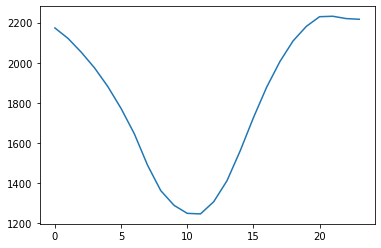

In [40]:
plt.plot(wind_ave)

We can see pretty clearly that the min is 10 or 11...let's dig a little more.

One way to do this is to drop the data into a data frame and then *sort* the data frame.

In [41]:
df_wind = pd.DataFrame(wind_ave)
df_wind

,MWh
0,2173.268493
1,2120.778082
2,2051.832877
3,1973.969863
4,1881.463014
5,1772.484932
6,1646.630137
7,1490.194521
8,1363.402740
9,1290.512329


I'm going to be adding more MWh values to the data frame in just a moment, so let's be clear that this is the average

In [42]:
df_wind.columns = ['Average MWh']

In [43]:
df_wind.sort_values(by='Average MWh',ascending=True).head()

,Average MWh
11,1247.643836
10,1250.408219
9,1290.512329
12,1308.287671
8,1363.402740


Ok -- so it looks as though mid-day is the minimum *average*.  

But what's the range?

In [44]:
wind_min = [] # initalizes a list to populate
wind_max = [] # initalizes a list to populate
for i in range(0,24):
    wind_min.append(np.min(wind.loc[windex.hour == i,:]))
    wind_max.append(np.max(wind.loc[windex.hour == i,:]))

In [45]:
wind_max[0]

Source    WIND TOTAL
MWh             4795
dtype: object

In [46]:
df_wind['min MWh']=pd.DataFrame(wind_min)['MWh']
df_wind['max MWh']=pd.DataFrame(wind_max)['MWh']

In [47]:
df_wind

,Average MWh,min MWh,max MWh
0,2173.268493,49,4795
1,2120.778082,33,4678
2,2051.832877,33,4696
3,1973.969863,36,4537
4,1881.463014,25,4377
5,1772.484932,17,4223
6,1646.630137,15,4161
7,1490.194521,29,3873
8,1363.402740,6,3905
9,1290.512329,10,3904


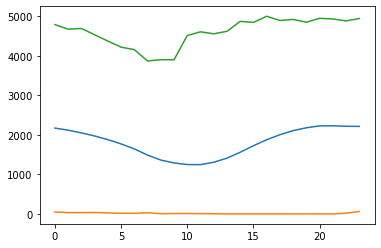

In [48]:
plt.plot(df_wind)

### Challenge question: What *month* had the highest wind production in the last year?